# ENEM 2020 a 2022

In [1]:
# Importa bibliotecas e carrega dados em um dataframe
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

from statsmodels.miscmodels.ordinal_model import OrderedModel
pd.set_option('display.max_columns', None)

Arquivo = 'MICRODADOS_ENEM_2020_1-1000.csv'

DF = pd.read_csv(Arquivo,engine="python", encoding='ISO-8859-1').drop(columns=['Unnamed: 0'])
DF = DF.dropna()

DF2 = pd.DataFrame([])

DF


,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
36,200003209996,2020,3,F,1,3,1,2,0,2,1.0,0,1302009.0,Itapiranga,13.0,AM,2.0,1.0,1.0,1304005,Silves,13,AM,1,1,1,1,677.0,649.0,660.0,667.0,486.9,509.7,532.3,433.9,DDAAADBCBAADDDBDCACAEDDDBDCEBADCBBEDCACDAEACB,CBEEDBEBBEDBCDCDCCABBAECBBDCAAAAEAECBABBBABBD,99999DDADDDDEBBCAEEAAEBCADCAAAECCCAECAEEDBAAAA...,CBEEDDABDCBDDAACACBAACEACBADBEBAEDACDADEAAACA,1,DBDACXDBEAAADECECACEACCCDBEEBECCABEADCCEDEABD,CDEEAEDCDEDCDDBDBCEECBAABACAABEAEECDDCBAEABCE,EEABEEDADDDDCEBEBEAAADBDBCCCCABCEDAEBAEEECDBDA...,CDBEAAECBADABCCAEBDBBADEDDBBCEAEBBADCEECADADE,1.0,120.0,120.0,120.0,140.0,120.0,620.0,E,E,A,A,4.0,B,A,B,C,A,B,B,A,A,A,A,A,A,B,A,B,D,B,A,A
65,200003350911,2020,3,F,1,3,1,2,0,2,1.0,0,2207009.0,Oeiras,22.0,PI,1.0,1.0,1.0,2207009,Oeiras,22,PI,1,1,1,1,598.0,567.0,577.0,588.0,516.8,565.7,567.7,384.2,DAEEADCEECBDABEDDDADDBEBCCECCBDCDCEDAADCBBDDC,EBCABBDDADDACCECACBBEAAEECCCACEDDACCBBAEBEBED,DAECC99999AADBDBCEDBADECDDADEBADEBACBAEADEEAEA...,DBADABDECBDDAADBCDBDDCDCDDDBBCDEBEDBDDCCCDCCE,0,CEDBDDDCACCBDAEBADCBDCDXAAECEDDDECDDCBDDAEDCC,DABCBDDDAEDBECECBBEDEBDEECBCCCBACDCCADEBDECDD,AAEDCACEEECEAACBAEBBEDACDBAADADDEBBEBAAADEACAA...,AEBCCXCCCACCDABCCABCABCBAECEDBBDBEEEDBBACCDAC,1.0,140.0,180.0,160.0,200.0,200.0,880.0,A,C,A,A,3.0,B,A,B,C,A,B,B,A,A,A,A,A,A,A,A,A,C,A,A,A
84,200005725669,2020,2,F,1,3,1,2,0,2,1.0,0,5108402.0,VÃ¡rzea Grande,51.0,MT,2.0,1.0,1.0,5108402,VÃ¡rzea Grande,51,MT,1,1,1,1,598.0,567.0,577.0,588.0,467.5,518.8,541.0,404.6,EACBDACEAEACEBEDADEBDADBCCBDDCABDACAECDEBECAE,DABDBECEADAAECBDAABDEAECACADDDDDDDBECADBCBCBD,99999ACECEAACECEEAABDDCCDADAADDDEAAEBBCEAABCAA...,ABEDDABDACBAEACDCEADA*DDDAEDDBAECBABADBEDBDEB,1,CEDBDDDCACCBDAEBADCBDCDXAAECEDDDECDDCBDDAEDCC,DABCBDDDAEDBECECBBEDEBDEECBCCCBACDCCADEBDECDD,AAEDCACEEECEAACBAEBBEDACDBAADADDEBBEBAAADEACAA...,AEBCCXCCCACCDABCCABCABCBAECEDBBDBEEEDBBACCDAC,1.0,100.0,120.0,120.0,140.0,120.0,600.0,C,E,C,B,6.0,B,B,C,C,A,B,B,B,B,A,A,A,A,B,A,B,E,A,A,A
89,200004462096,2020,2,F,1,1,1,2,0,2,1.0,0,3513603.0,Cunha,35.0,SP,2.0,1.0,1.0,3518404,GuaratinguetÃ¡,35,SP,1,1,1,1,598.0,567.0,577.0,588.0,578.4,681.1,638.2,669.8,CAABECCCBCDBEDECEDCBDAEDAEBCADEBDCDDEEEBCEDEB,DDCCBDEDADDACCECACEDEADEECDCBCDACDECADEBDECDD,99999ACEEEABDBCBBEDBEDACDBAAECDDEBACBACADEDCCE...,ABCBDBCEADCBAACCBABCDECBABDEAADDCEEEBABACCEBE,1,CEDBDDDCACCBDAEBADCBDCDXAAECEDDDECDDCBDDAEDCC,DABCBDDDAEDBECECBBEDEBDEECBCCCBACDCCADEBDECDD,AAEDCACEEECEAACBAEBBEDACDBAADADDEBBEBAAADEACAA...,AEBCCXCCCACCDABCCABCABCBAECEDBBDBEEEDBBACCDAC,1.0,160.0,120.0,180.0,180.0,180.0,820.0,B,C,C,A,3.0,C,A,B,B,B,B,B,B,B,A,B,A,A,B,B,A,C,A,B,B
93,200002727241,2020,4,M,1,2,1,2,0,2,1.0,0,3302007.0,ItaguaÃ­,33.0,RJ,1.0,1.0,1.0,3302007,ItaguaÃ­,33,RJ,1,1,1,1,597.0,569.0,580.0,587.0,606.3,659.8,607.1,743.0,DDBACEDBDECEAEBDBEACADDDEBDAECACEDBAECDBCDBDE,DECAABEBDECBAECDDCBDCDEDEEEDBCDDAEDBECEDBDACE,ECDAA99999DABCBEBEDAAADBDAEACEDAECECDDEADECDBE...,BADCEBEDABCCCABEDEABDECCABEEECABACEDBBBAEBAEC,0,DDBACBDDDECDAEDCCCEDBDDCBDDCAAECEDDACCBAEDCDX,DECCADEBDECBBECDDCBACDBDEEDABCDDAEDBECECBCCBD,DCEAAEEEACAACBBEBEBAAADBBAEBCEDBAADADDEADEBDAC...,DABCCAEDBBCCCABCACCBDXCCCBEEEDBBACCDACBAEBAEC,1.0,160.0,200.0,160.0,200.0,200.0,920.0,E,E,C,C,4.0,F,A,B,C,B,A,B,B,B,B,B,A,B,C,B,

## Idade por gênero

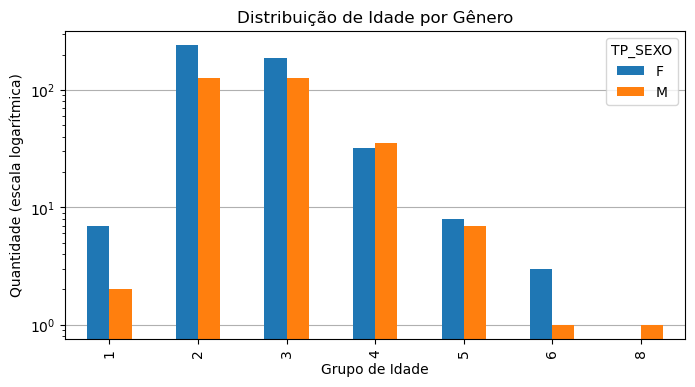

In [3]:
grupo = 'TP_SEXO'
subgrupo = 'TP_FAIXA_ETARIA'


df_contagem = DF.groupby([grupo, subgrupo]).size().unstack(grupo)

# Cria a figura e o objeto de eixos, especificando o tamanho da figura.
fig, ax = plt.subplots(figsize=(8, 4))

# Cria o gráfico de barras.
df_contagem.plot(kind='bar', ax=ax)

plt.title('Distribuição de Idade por Gênero')
plt.xlabel('Grupo de Idade')
plt.ylabel('Quantidade (escala logarítmica)')

# Define a escala do eixo y como logarítmica
ax.set_yscale("log")

plt.grid(True, axis='y')
ax.set_axisbelow(True)

plt.show()

## Faixa etária por estado civil

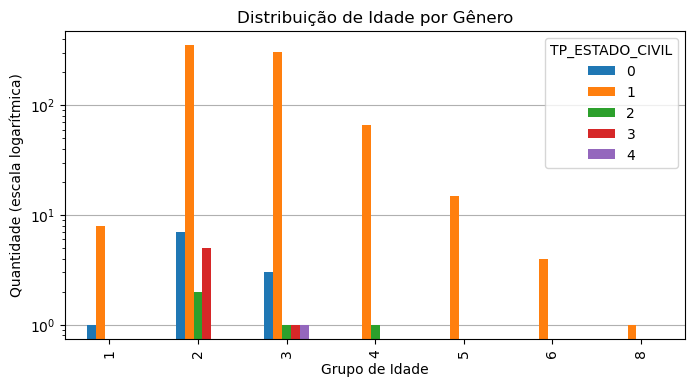

In [4]:
grupo = 'TP_ESTADO_CIVIL'
subgrupo = 'TP_FAIXA_ETARIA'


df_contagem = DF.groupby([grupo, subgrupo]).size().unstack(grupo)

# Cria a figura e o objeto de eixos, especificando o tamanho da figura.
fig, ax = plt.subplots(figsize=(8, 4))

# Cria o gráfico de barras.
df_contagem.plot(kind='bar', ax=ax)

plt.title('Distribuição de Idade por Gênero')
plt.xlabel('Grupo de Idade')
plt.ylabel('Quantidade (escala logarítmica)')

# Define a escala do eixo y como logarítmica
ax.set_yscale("log")

plt.grid(True, axis='y')
ax.set_axisbelow(True)

plt.show()

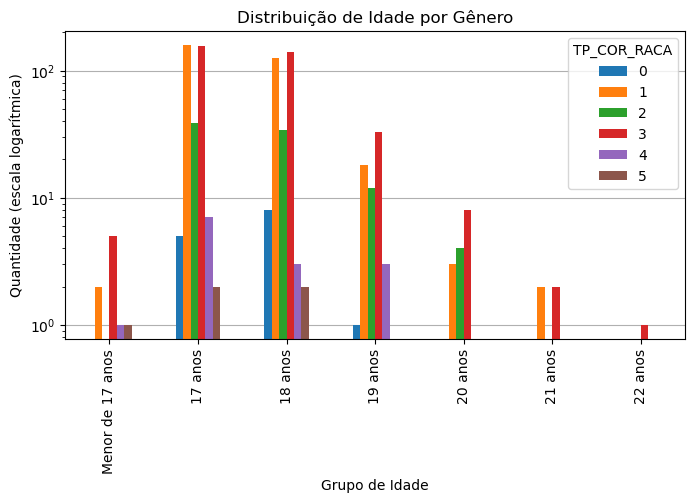

In [5]:
grupo = 'TP_COR_RACA'
subgrupo = 'TP_FAIXA_ETARIA'


df_contagem = DF.groupby([grupo, subgrupo]).size().unstack(grupo)

# Cria a figura e o objeto de eixos, especificando o tamanho da figura.
fig, ax = plt.subplots(figsize=(8, 4))

# Cria o gráfico de barras.
df_contagem.plot(kind='bar', ax=ax)

plt.title('Distribuição de Idade por Gênero')
plt.xlabel('Grupo de Idade')
plt.ylabel('Quantidade (escala logarítmica)')


novos_rotulos = ['Menor de 17 anos',
                '17 anos',
                '18 anos',
                '19 anos',
                '20 anos',
                '21 anos',
                '22 anos'] # Substitua com seus rótulos.


ax.set_xticklabels(novos_rotulos)

# Define a escala do eixo y como logarítmica
ax.set_yscale("log")

plt.grid(True, axis='y')
ax.set_axisbelow(True)

plt.show()

## Total de candidatos por estado

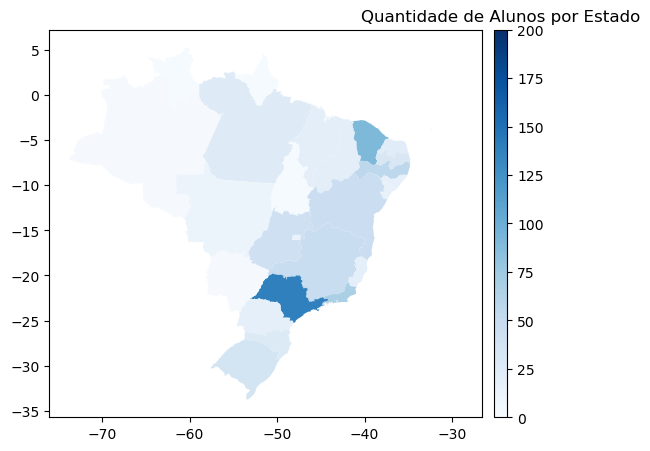

In [6]:

# Cria um DataFrame que conta a quantidade de alunos por estado
df_contagem = DF['SG_UF_ESC'].value_counts()

# Carrega o shapefile dos estados brasileiros
brasil = gpd.read_file('BR_UF_2021.shp')

# Une o DataFrame de contagem com o GeoDataFrame do Brasil
brasil = brasil.set_index('SIGLA').join(df_contagem)

# Cria o mapa de cores
fig, ax = plt.subplots(1, 1, figsize=(6, 6))  # Altera o tamanho da figura

# Cria um novo conjunto de eixos para a barra de cores
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.05)  # Altera o tamanho da barra de cores

brasil.plot(column='SG_UF_ESC', ax=ax, legend=True, cax=cax, cmap='Blues',vmin=0, vmax=200)  # Altera o mapa de cores

plt.title('Quantidade de Alunos por Estado')
plt.show()


# Idade

Para que a regularização dos valores de idade não fique muito discrepantes com idades altas e pouco frequentes na amostra idades superiores a 25 anos foram concideradas outliers.

A seguir um histogramaa dos valores e a contagem dos valores.

In [7]:

DF2['IDADE'] = DF['TP_FAIXA_ETARIA'].apply(lambda x: (x-1)/19)


# Dicionário de substituição
replacement_dict = {
    1:'-17',
    2:'17',
    3:'18',
    4:'19',
    5:'20',
    6:'21',
    7:'22',
    8:'23',
    9:'24',
    10:'25',
    11:'26~30',
    12:'31~35',
    13:'36~40',
    14:'41~45',
    15:'46~50',
    16:'51~55',
    17:'56~65',
    18:'61~65',
    19:'66~70',
    20:'+70'
}

# Substitui os valores na coluna
DF['TP_FAIXA_ETARIA'] = DF['TP_FAIXA_ETARIA'].replace(replacement_dict)

In [ ]:

grupo = 'TP_ESCOLA'
subgrupo = 'TP_FAIXA_ETARIA'


df_contagem = DF.groupby([grupo, subgrupo]).size().unstack(grupo)


# Cria a figura e o objeto de eixos, especificando o tamanho da figura.
fig, ax = plt.subplots(figsize=(8, 4))

# Cria o gráfico de barras.
df_contagem.plot(kind='bar', ax=ax)

plt.title('Distribuição de Idade por Gênero')
plt.xlabel('Grupo de Idade')
plt.ylabel('Quantidade (escala logarítmica)')

# Define a escala do eixo y como logarítmica
ax.set_yscale("log")

plt.grid(True, axis='y')
ax.set_axisbelow(True)

plt.show()

# Sexo
0: masculino
1: feminino

In [8]:
DF2['MASCULINO'] = DF['TP_SEXO'].apply(lambda x: 0 if x=='M' else 1)

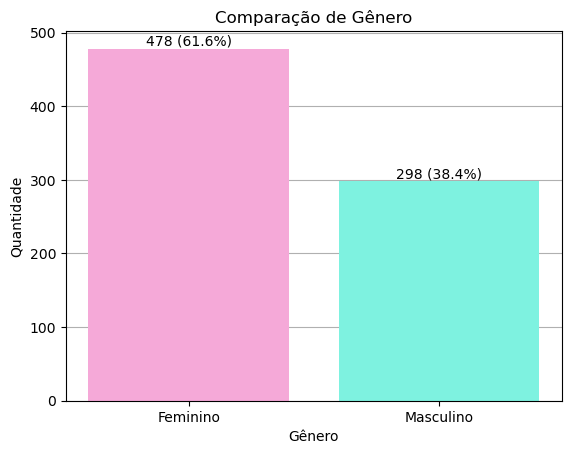

In [30]:
# Substitui os valores na coluna
DF['TP_SEXO'] = DF['TP_SEXO'].replace({'M': 'Masculino',
                                              'F':'Feminino'
                                              })

quantidade = DF['TP_SEXO'].value_counts()

# Cálculo da porcentagem
porcentagem = quantidade / quantidade.sum() * 100

fig, ax = plt.subplots()
bars = ax.bar(quantidade.index, quantidade.values, color=['#F5A9D8','#7EF2E0'])

plt.title('Comparação de Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')

plt.grid(True, axis='y')
ax.set_axisbelow(True)

# Adicionando as labels no topo de cada barra
for bar, qtd, pct in zip(bars, quantidade.values, porcentagem.values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.3, f'{qtd} ({pct:.1f}%)', ha='center', va='bottom')

plt.show()

# Cor Raça
0	Não declarado

1	Branca

2	Preta

3	Parda

4	Amarela

5	Indígena 

Binarização exclui a opção "Não declarado".

In [9]:
DF2['Cor_Branca'] = DF['TP_COR_RACA'].apply(lambda x: 1 if x==1 else 0)
DF2['Cor_Preta'] = DF['TP_COR_RACA'].apply(lambda x: 1 if x==2 else 0)
DF2['Cor_Parda'] = DF['TP_COR_RACA'].apply(lambda x: 1 if x==3 else 0)
DF2['Cor_Amarela'] = DF['TP_COR_RACA'].apply(lambda x: 1 if x==4 else 0)
DF2['Cor_Indígena'] = DF['TP_COR_RACA'].apply(lambda x: 1 if x==5 else 0)


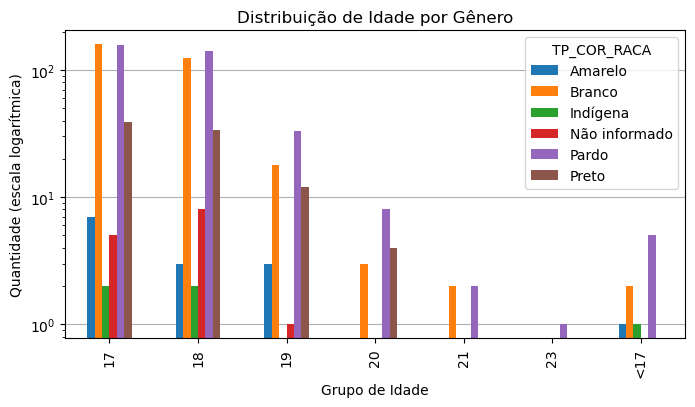

In [10]:

# Dicionário de substituição
replacement_dict = {
    0: 'Não informado',
    1: 'Branco',
    2: 'Preto',
    3: 'Pardo',
    4: 'Amarelo',
    5: 'Indígena'
}

# Substitui os valores na coluna
DF['TP_COR_RACA'] = DF['TP_COR_RACA'].replace(replacement_dict)

grupo = 'TP_COR_RACA'
subgrupo = 'TP_FAIXA_ETARIA'


df_contagem = DF.groupby([grupo, subgrupo]).size().unstack(grupo)


# Cria a figura e o objeto de eixos, especificando o tamanho da figura.
fig, ax = plt.subplots(figsize=(8, 4))

# Cria o gráfico de barras.
df_contagem.plot(kind='bar', ax=ax)

plt.title('Distribuição de Idade por Gênero')
plt.xlabel('Grupo de Idade')
plt.ylabel('Quantidade (escala logarítmica)')

# Define a escala do eixo y como logarítmica
ax.set_yscale("log")

plt.grid(True, axis='y')
ax.set_axisbelow(True)

plt.show()

# Tipo de escola

1	Não Respondeu

2	Pública

3	Privada

4	Exterior

Binarização exclui a opção "Não respondeu".

In [11]:

DF2['ESC_PUBL'] = DF['TP_ESCOLA'].apply(lambda x: 1 if x==2 else 0)



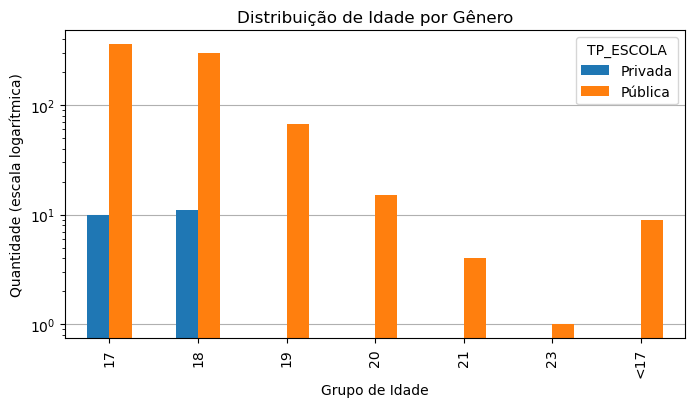

In [32]:


# Substitui os valores na coluna
DF['TP_ESCOLA'] = DF['TP_ESCOLA'].replace({ 1:	'Não Respondeu',
                                                2:	'Pública',
                                                3:	'Privada',
                                                4:	'Exterior'
                                                })

grupo = 'TP_ESCOLA'
subgrupo = 'TP_FAIXA_ETARIA'


df_contagem = DF.groupby([grupo, subgrupo]).size().unstack(grupo)


# Cria a figura e o objeto de eixos, especificando o tamanho da figura.
fig, ax = plt.subplots(figsize=(8, 4))

# Cria o gráfico de barras.
df_contagem.plot(kind='bar', ax=ax)

plt.title('Distribuição de Idade por Gênero')
plt.xlabel('Grupo de Idade')
plt.ylabel('Quantidade (escala logarítmica)')

# Define a escala do eixo y como logarítmica
ax.set_yscale("log")

plt.grid(True, axis='y')
ax.set_axisbelow(True)

plt.show()

In [12]:
DF2['CH'] = pd.cut( DF['NU_NOTA_CH'], bins = 5, labels= False)
DF2['CN'] = pd.cut( DF['NU_NOTA_CN'], bins = 5, labels= False)
DF2['LC'] = pd.cut( DF['NU_NOTA_LC'], bins = 5, labels= False)
DF2['MT'] = pd.cut( DF['NU_NOTA_MT'], bins = 5, labels= False)
DF2['REDACAO'] = pd.cut( DF['NU_NOTA_REDACAO'], bins = 5, labels= False)
DF2['SG_UF_ESC'] = DF['SG_UF_ESC']

## Percentual das categorias de desempenho em matemática por estado

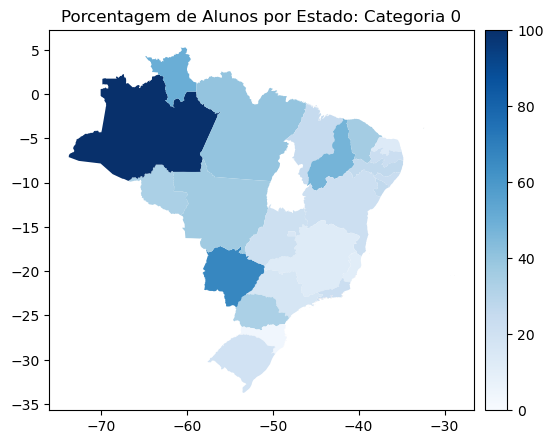

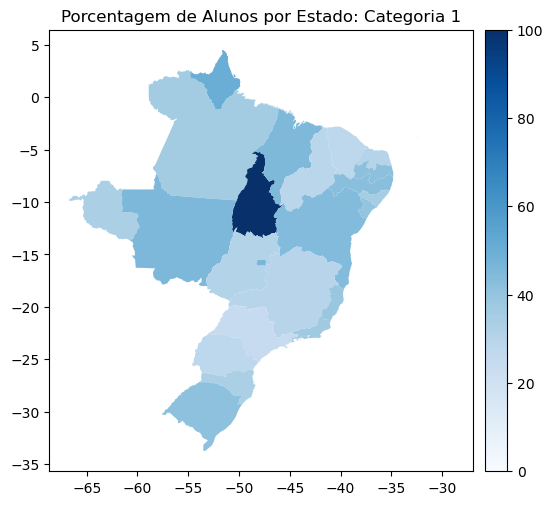

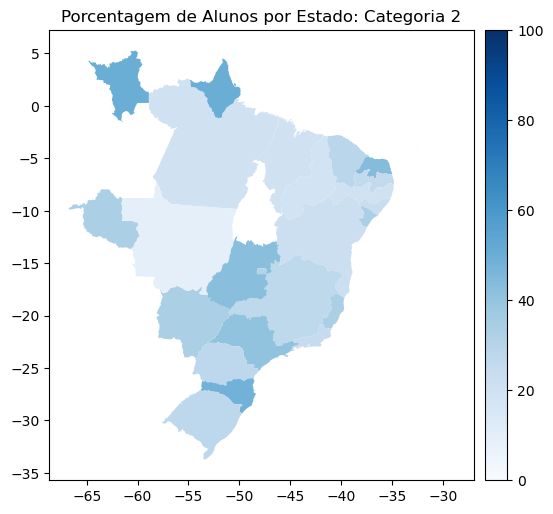

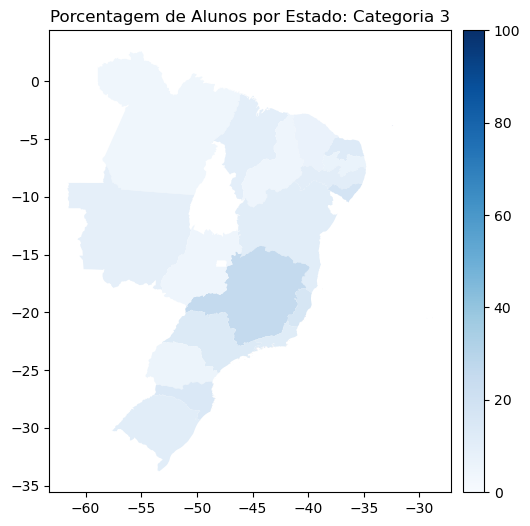

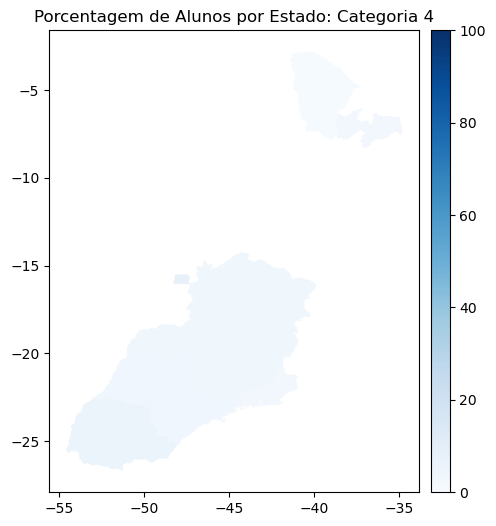

In [13]:

# Cria um DataFrame que conta a quantidade de alunos por categoria e estado
df_contagem = DF2.groupby(['SG_UF_ESC', 'MT']).size().reset_index(name='counts')

# Calcula o total de alunos por estado
total_por_estado = DF2['SG_UF_ESC'].value_counts().reset_index()
total_por_estado.columns = ['SG_UF_ESC', 'total']

# Une o DataFrame de contagem com o total por estado
df_contagem = df_contagem.merge(total_por_estado, on='SG_UF_ESC')

# Calcula a porcentagem de alunos em cada categoria para cada estado
df_contagem['percentage'] = df_contagem['counts'] / df_contagem['total'] * 100

# Carrega o shapefile dos estados brasileiros
brasil = gpd.read_file('BR_UF_2021.shp')

# Une o DataFrame de contagem com o GeoDataFrame do Brasil
brasil = brasil.merge(df_contagem, left_on='SIGLA', right_on='SG_UF_ESC')

# Cria um mapa de cores para cada categoria
for categoria in sorted(DF2['MT'].unique()):
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    brasil[brasil['MT'] == categoria].plot(column='percentage', ax=ax, legend=True, cax=cax, cmap='Blues',vmin=0, vmax=100)
    ax.set_title(f'Porcentagem de Alunos por Estado: Categoria {categoria}')
    plt.show()


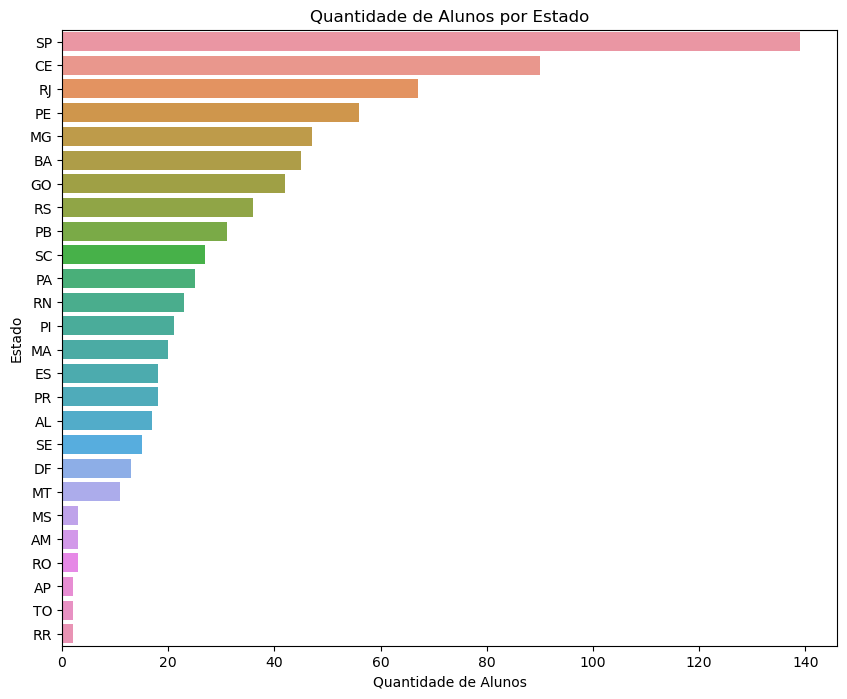

In [28]:

# Cria um DataFrame que conta a quantidade de alunos por estado
df_contagem = DF2['SG_UF_ESC'].value_counts().reset_index()

# Renomeia as colunas
df_contagem.columns = ['SG_UF_ESC', 'quantidade']

# Cria o gráfico de barras
plt.figure(figsize=(10,8))
sns.barplot(x='quantidade', y='SG_UF_ESC', data=df_contagem)

plt.title('Quantidade de Alunos por Estado')
plt.xlabel('Quantidade de Alunos')
plt.ylabel('Estado')

plt.show()



In [15]:
DF2['Estudo_Pai'] = DF['Q001'].replace({'A':0,
                                       'B':1/6,
                                       'C':2/6,
                                       'D':3/6,
                                       'E':4/6,
                                       'F':5/6,
                                       'G':6/6,
                                       'H':0,
                                      })


# Q001
## Até que série seu pai, ou o homem responsável por você, estudou?

A	Nunca estudou.

B	Não completou a 4ª série/5º ano do Ensino Fundamental.

C	Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.

D	Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.

E	Completou o Ensino Médio, mas não completou a Faculdade.

F	Completou a Faculdade, mas não completou a Pós-graduação.

G	Completou a Pós-graduação.

H	Não sei.


Como a maioria das categorias são ordinais uma única variável onde 0 representa "Nunca estudou" e 1 representa "completou a Pós-graduação". Respostas marcadas como "Não sei." serão consideradas de valor zero.

A categoria "Estudo_Pai" pode ser entendida como a ciência do estudante da escolaridade do pai até determinado grau onde:

### 0: Não sabe ou o pai nunca estudou.
### 1: Pai completou a pós graduação.

In [16]:
DF2['Estudo_Mae'] = DF['Q002'].replace({'A':0,
                                       'B':1/6,
                                       'C':2/6,
                                       'D':3/6,
                                       'E':4/6,
                                       'F':5/6,
                                       'G':6/6,
                                       'H':0,
                                      })



# Q003

## A partir da apresentação de algumas ocupações divididas em grupos ordenados, indique o grupo que contempla a ocupação mais próxima da ocupação do seu pai ou do homem responsável por você. (Se ele não estiver trabalhando, escolha uma ocupação pensando no último trabalho dele).

A	Grupo 1: Lavrador, agricultor sem empregados, bóia fria, criador de animais (gado, porcos, galinhas, ovelhas, cavalos etc.), apicultor, pescador, lenhador, seringueiro, extrativista.

B	Grupo 2: Diarista, empregado doméstico, cuidador de idosos, babá, cozinheiro (em casas particulares), motorista particular, jardineiro, faxineiro de empresas e prédios, vigilante, porteiro, carteiro, office-boy, vendedor, caixa, atendente de loja, auxiliar administrativo, recepcionista, servente de pedreiro, repositor de mercadoria.

C	Grupo 3: Padeiro, cozinheiro industrial ou em restaurantes, sapateiro, costureiro, joalheiro, torneiro mecânico, operador de máquinas, soldador, operário de fábrica, trabalhador da mineração, pedreiro, pintor, eletricista, encanador, motorista, caminhoneiro, taxista.

D	Grupo 4: Professor (de ensino fundamental ou médio, idioma, música, artes etc.), técnico (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretor de imóveis, supervisor, gerente, mestre de obras, pastor, microempresário (proprietário de empresa com menos de 10 empregados), pequeno comerciante, pequeno proprietário de terras, trabalhador autônomo ou por conta própria.

E	Grupo 5: Médico, engenheiro, dentista, psicólogo, economista, advogado, juiz, promotor, defensor, delegado, tenente, capitão, coronel, professor universitário, diretor em empresas públicas ou privadas, político, proprietário de empresas com mais de 10 empregados.

F	Não sei.


### O grupo excluido na binarização será o F "Não sei"

In [17]:
DF2['Ocupacao_Pai_1'] = DF['Q003'].apply(lambda x: 1 if x=='A' else 0)
DF2['Ocupacao_Pai_2'] = DF['Q003'].apply(lambda x: 1 if x=='B' else 0)
DF2['Ocupacao_Pai_3'] = DF['Q003'].apply(lambda x: 1 if x=='C' else 0)
DF2['Ocupacao_Pai_4'] = DF['Q003'].apply(lambda x: 1 if x=='D' else 0)
DF2['Ocupacao_Pai_5'] = DF['Q003'].apply(lambda x: 1 if x=='E' else 0)



In [18]:
DF2['Ocupacao_Mae_1'] = DF['Q004'].apply(lambda x: 1 if x=='A' else 0)
DF2['Ocupacao_Mae_2'] = DF['Q004'].apply(lambda x: 1 if x=='B' else 0)
DF2['Ocupacao_Mae_3'] = DF['Q004'].apply(lambda x: 1 if x=='C' else 0)
DF2['Ocupacao_Mae_4'] = DF['Q004'].apply(lambda x: 1 if x=='D' else 0)
DF2['Ocupacao_Mae_5'] = DF['Q004'].apply(lambda x: 1 if x=='E' else 0)


In [19]:
DF2['Pessoas_casa'] = DF['Q005'].apply(lambda x: (x-1)/19)
DF = DF.drop(columns = 'Q005')

In [20]:
DF2['Renda'] = DF['Q006'].replace({'A':0,
                    'B':2,
                    'C':3,
                    'D':4,
                    'E':5,
                    'F':6,
                    'G':7,
                    'H':8,
                    'I':9,
                    'J':10,
                    'K':11,
                    'L':12,
                    'M':13,
                    'N':14,
                    'O':15,
                    'P':16,
                    'Q':17,
                   })




In [21]:
DF2

,IDADE,MASCULINO,Cor_Branca,Cor_Preta,Cor_Parda,Cor_Amarela,Cor_Indígena,ESC_PUBL,CH,CN,LC,MT,REDACAO,SG_UF_ESC,Estudo_Pai,Estudo_Mae,Ocupacao_Pai_1,Ocupacao_Pai_2,Ocupacao_Pai_3,Ocupacao_Pai_4,Ocupacao_Pai_5,Ocupacao_Mae_1,Ocupacao_Mae_2,Ocupacao_Mae_3,Ocupacao_Mae_4,Ocupacao_Mae_5,Pessoas_casa,Renda
36,0.105263,1,0,0,1,0,0,1,1,1,2,0,3,AM,0.666667,0.666667,1,0,0,0,0,1,0,0,0,0,0.157895,2
65,0.105263,1,0,0,1,0,0,1,2,2,2,0,4,PI,0.000000,0.333333,1,0,0,0,0,1,0,0,0,0,0.105263,2
84,0.052632,1,0,0,1,0,0,1,1,1,2,0,3,MT,0.333333,0.666667,0,0,1,0,0,0,1,0,0,0,0.263158,2
89,0.052632,1,1,0,0,0,0,1,3,3,3,2,4,SP,0.166667,0.333333,0,0,1,0,0,1,0,0,0,0,0.105263,3
93,0.157895,0,0,1,0,0,0,1,3,3,3,3,4,RJ,0.666667,0.666667,0,0,1,0,0,0,0,1,0,0,0.157895,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,0.000000,0,0,0,1,0,0,1,3,2,3,2,3,MA,0.500000,0.333333,1,0,0,0,0,1,0,0,0,0,0.315789,5
5874,0.052632,1,0,0,1,0,0,1,2,2,2,1,4,PB,0.500000,0.666667,0,0,1,0,0,0,0,0,1,0,0.157895,2
5876,0.052632,1,1,0,0,0,0,1,3,3,3,3,4,SP,1.000000,0.666667,0,0,0,1,0,0,0,0,1,0,0.105263,4
5880,0.105263,1,1,0,0,0,0,1,3,3,4,2,4,RS,0.833333,0.666667,0,0,0,1,0,0,1,0,0,0,0.052632,2


In [22]:
def reg_log (x,y):
    mod_log = OrderedModel(y, X, distr='logit')
    res_log = mod_log.fit(method='bfgs', disp=False)
    col =['Var','coef','std','z','p-value','2,5%','97,5%']
    resul = pd.DataFrame(res_log.summary().tables[1][1:],columns = col)
    params = res_log.params
    pvalues = res_log.pvalues
    
    return [resul,params,pvalues]

def cria_exogenas(DATA,RemoCol):
    exo= DATA[list (DATA.drop(columns = RemoCol).columns)]
    return exo

# Declaração da variável endógena
Var_Dep ='MT'

# Lista iniciais de variáveis a serem desconcideradas
Var_Remo = ['MT', 'CH','CN','LC','REDACAO']

# Critério para p-value
crit =0.05

y = DF2[Var_Dep]
X = cria_exogenas(DF2,Var_Remo)

[resul,parm,pval]=reg_log(X,y)

print(resul)

extrai = pval[0:-4][pval>=crit].index

for i in extrai:
    Var_Remo.append(i)

conta=0
    
while (len(extrai)!=0):
    conta=conta+1
    print("loop: ",conta)
    extrai=[]
    X = cria_exogenas(DF2,Var_Remo)
    [resul,parm,pval]=reg_log(X,y)
    extrai = pval[0:-4][pval>=crit].index
    for i in extrai:
        Var_Remo.append(i)
        
    print(resul)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data). The types seen wereNone and IDADE             float64
MASCULINO           int64
Cor_Branca          int64
Cor_Preta           int64
Cor_Parda           int64
Cor_Amarela         int64
Cor_Indígena        int64
ESC_PUBL            int64
SG_UF_ESC          object
Estudo_Pai        float64
Estudo_Mae        float64
Ocupacao_Pai_1      int64
Ocupacao_Pai_2      int64
Ocupacao_Pai_3      int64
Ocupacao_Pai_4      int64
Ocupacao_Pai_5      int64
Ocupacao_Mae_1      int64
Ocupacao_Mae_2      int64
Ocupacao_Mae_3      int64
Ocupacao_Mae_4      int64
Ocupacao_Mae_5      int64
Pessoas_casa      float64
Renda               int64
dtype: object. The data was
36      0
65      0
84      0
89      2
93      3
       ..
5870    2
5874    1
5876    3
5880    2
5881    2
Name: MT, Length: 776, dtype: int64
and
          IDADE  MASCULINO  Cor_Branca  Cor_Preta  Cor_Parda  Cor_Amarela  \
36    0.105263          1           0          0          1            0   
65    0.105263          1           0          0          1            0   
84    0.052632          1           0          0          1            0   
89    0.052632          1           1          0          0            0   
93    0.157895          0           0          1          0            0   
...        ...        ...         ...        ...        ...          ...   
5870  0.000000          0           0          0          1            0   
5874  0.052632          1           0          0          1            0   
5876  0.052632          1           1          0          0            0   
5880  0.105263          1           1          0          0            0   
5881  0.052632          0           1          0          0            0   

      Cor_Indígena  ESC_PUBL SG_UF_ESC  Estudo_Pai  Estudo_Mae  \
36               0         1        AM    0.666667    0.666667   
65               0         1        PI    0.000000    0.333333   
84               0         1        MT    0.333333    0.666667   
89               0         1        SP    0.166667    0.333333   
93               0         1        RJ    0.666667    0.666667   
...            ...       ...       ...         ...         ...   
5870             0         1        MA    0.500000    0.333333   
5874             0         1        PB    0.500000    0.666667   
5876             0         1        SP    1.000000    0.666667   
5880             0         1        RS    0.833333    0.666667   
5881             0         1        PI    0.333333    0.666667   

      Ocupacao_Pai_1  Ocupacao_Pai_2  Ocupacao_Pai_3  Ocupacao_Pai_4  \
36                 1               0               0               0   
65                 1               0               0               0   
84                 0               0               1               0   
89                 0               0               1               0   
93                 0               0               1               0   
...              ...             ...             ...             ...   
5870               1               0               0               0   
5874               0               0               1               0   
5876               0               0               0               1   
5880               0               0               0               1   
5881               1               0               0               0   

      Ocupacao_Pai_5  Ocupacao_Mae_1  Ocupacao_Mae_2  Ocupacao_Mae_3  \
36                 0               1               0               0   
65                 0               1               0               0   
84                 0               0               1               0   
89                 0               1               0               0   
93                 0               0               0               1   
...              ...             ...             ...             ...   
5870               0               1               0               0   
5874               0               0               0               0   
5876               0               0               0               0   
5880               0               0               1               0   
5881               0               0               1               0   

      Ocupacao_Mae_4  Ocupacao_Mae_5  Pessoas_casa  Renda  
36                 0               0      0.157895      2  
65                 0               0      0.105263      2  
84                 0               0      0.263158      2  
89                 0               0      0.105263      3  
93                 0               0      0.157895      6  
...              ...             ...           ...    ...  
5870               0               0      0.315789      5  
5874               1               0      0.157895      2  
5876               1               0      0.105263      4  
5880               0               0      0.052632      2  
5881               0               0      0.157895      2  

[776 rows x 23 columns]
before. After,
[0 0 0 2 3 0 0 1 1 2 2 1 1 2 2 2 1 1 2 0 2 2 1 1 1 0 2 1 2 0 2 2 0 1 2 1 1
 1 2 2 1 2 3 0 2 1 3 0 0 0 0 1 4 1 0 1 2 0 2 1 0 0 1 1 2 2 1 1 0 1 2 1 1 2
 0 3 0 2 0 2 3 0 2 0 1 2 2 1 0 2 0 0 1 0 3 1 1 3 3 2 0 0 2 2 1 0 4 1 0 2 2
 3 1 2 0 0 2 1 0 0 1 1 2 2 2 2 1 0 2 2 2 2 1 0 2 0 4 2 2 0 2 2 3 2 1 1 0 2
 0 3 1 3 1 0 1 2 1 0 2 1 2 0 2 2 1 2 3 0 0 1 1 1 3 0 2 0 2 0 1 3 1 0 0 3 2
 2 2 0 4 0 2 2 0 2 0 2 0 1 0 1 0 3 0 0 3 1 0 2 0 4 2 0 3 0 1 1 3 3 2 0 3 3
 2 1 1 1 0 1 3 1 1 1 1 1 2 1 0 1 1 1 0 2 2 2 1 2 1 2 0 0 2 0 2 1 0 1 2 1 2
 2 3 2 1 1 1 0 0 3 1 2 2 1 3 1 2 3 1 2 2 3 0 3 0 2 1 1 1 1 1 1 0 2 3 2 2 2
 1 1 2 1 1 3 1 1 0 1 1 4 2 0 2 1 0 0 1 0 3 3 1 1 1 1 1 0 1 1 1 3 0 1 1 0 1
 0 0 2 2 3 3 0 1 0 2 3 2 2 1 0 2 4 2 1 2 1 3 2 2 1 1 2 2 2 0 1 0 1 3 2 2 1
 2 2 1 0 2 1 1 1 0 2 1 3 4 2 3 3 2 1 1 1 1 2 0 2 0 2 0 1 0 0 0 1 0 0 1 2 2
 0 2 2 1 0 2 0 2 2 2 1 1 3 2 1 2 1 0 3 0 2 1 0 0 1 1 2 1 1 0 2 0 1 1 1 1 1
 1 2 0 2 0 3 2 1 1 1 1 1 0 3 1 1 4 0 1 2 1 1 1 1 3 1 0 0 3 1 1 1 1 1 0 1 0
 2 1 2 2 2 0 2 3 1 0 3 1 1 1 3 2 2 3 0 3 2 0 1 1 2 4 1 2 3 2 2 2 3 3 2 1 1
 2 1 2 0 3 0 3 4 1 2 3 0 2 1 0 2 2 3 0 0 1 2 0 1 2 1 1 3 2 1 0 1 0 0 0 0 2
 1 1 2 0 2 0 0 2 0 3 1 0 1 0 3 3 3 1 3 2 1 0 1 2 3 2 1 3 2 1 0 2 1 1 2 2 1
 0 1 1 0 1 1 1 1 1 1 2 2 2 1 1 2 2 0 2 1 2 1 0 3 2 1 0 2 2 0 2 2 2 0 0 3 2
 1 0 2 1 1 2 2 0 2 1 0 1 0 0 1 2 1 2 1 0 3 0 1 2 2 1 1 1 0 1 2 3 1 2 0 1 3
 1 1 2 1 0 2 3 0 1 2 1 1 3 0 2 1 2 1 3 1 1 2 0 2 2 2 2 2 0 1 2 1 3 2 0 1 2
 2 2 2 0 1 1 4 1 1 2 2 1 2 1 1 1 2 0 1 0 1 1 1 1 0 0 1 1 0 2 2 2 0 2 0 1 2
 2 2 2 0 1 2 2 1 3 0 2 0 1 0 3 0 2 2 0 3 2 2 1 1 1 1 2 1 4 3 0 2 1 3 2 2]
[[0.10526315789473684 1 0 ... 0 0.15789473684210525 2]
 [0.10526315789473684 1 0 ... 0 0.10526315789473684 2]
 [0.05263157894736842 1 0 ... 0 0.2631578947368421 2]
 ...
 [0.05263157894736842 1 1 ... 0 0.10526315789473684 4]
 [0.10526315789473684 1 1 ... 0 0.05263157894736842 2]
 [0.05263157894736842 0 1 ... 0 0.15789473684210525 2]].

In [ ]:
resul[0:-4]

In [ ]:
#resul.to_csv(Arquivo.split('.')[0]+'_resultado_regressão.csv')

In [29]:
DF.columns


Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',